In [13]:
# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [18]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
df=pd.read_csv("pima-indians-diabetes.csv", header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,6,148,72,35,0,33.6,0.627,58,0.582016,1,...,51,35,0,33.6,0.627,66,0.073498,1,50,1
1,1,85,66,29,0,26.6,0.351,97,0.832630,9,...,32,29,0,26.6,0.351,67,0.296772,1,31,0
2,8,183,64,0,0,23.3,0.672,51,0.305414,8,...,33,0,0,23.3,0.672,83,0.092107,6,32,1
3,1,89,66,23,94,28.1,0.167,16,0.175202,1,...,22,23,94,28.1,0.167,31,0.246629,8,21,0
4,0,137,40,35,168,43.1,2.288,9,0.041532,2,...,34,35,168,43.1,2.288,62,0.301854,3,33,1
5,5,116,74,0,0,25.6,0.201,6,0.796317,8,...,31,0,0,25.6,0.201,32,0.503962,9,30,0
6,3,78,50,32,88,31.0,0.248,42,0.649129,7,...,27,32,88,31.0,0.248,81,0.575259,4,26,1
7,10,115,0,0,0,35.3,0.134,28,0.423688,1,...,30,0,0,35.3,0.134,55,0.473132,7,29,0
8,2,197,70,45,543,30.5,0.158,74,0.461396,3,...,54,45,543,30.5,0.158,50,0.868384,6,53,1
9,8,125,96,0,0,0.0,0.232,2,0.288525,8,...,55,0,0,0.0,0.232,68,0.788383,6,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    float64
 9   9       768 non-null    int64  
 10  10      768 non-null    int64  
 11  11      768 non-null    int64  
 12  12      768 non-null    int64  
 13  13      768 non-null    int64  
 14  14      768 non-null    float64
 15  15      768 non-null    float64
 16  16      768 non-null    int64  
 17  17      768 non-null    float64
 18  18      768 non-null    int64  
 19  19      768 non-null    int64  
 20  20      768 non-null    int64  
dtypes: float64(6), int64(15)
memory usage: 

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,...,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,48.911458,0.502363,5.441406,...,34.240885,20.536458,79.799479,31.992578,0.471876,49.942708,0.499174,5.691406,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,29.356772,0.284582,2.846202,...,11.760232,15.952218,115.244002,7.884160,0.331329,28.204863,0.297853,2.869128,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,1.000000,0.001607,1.000000,...,22.000000,0.000000,0.000000,0.000000,0.078000,1.000000,0.003838,1.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,23.000000,0.255150,3.000000,...,25.000000,0.000000,0.000000,27.300000,0.243750,26.750000,0.239481,3.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,47.000000,0.506342,5.000000,...,30.000000,23.000000,30.500000,32.000000,0.372500,51.000000,0.500552,6.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,75.000000,0.744777,8.000000,...,42.000000,32.000000,127.250000,36.600000,0.626250,73.000000,0.753453,8.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,100.000000,0.999659,10.000000,...,82.000000,99.000000,846.000000,67.100000,2.420000,100.000000,0.999775,10.000000,81.000000,1.000000


In [6]:
X_data = df.iloc[:, 0:19]
Y_data = df.iloc[:, 20]

In [7]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_Y,valid_Y = train_test_split(X_data, Y_data, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape

((614, 19), (154, 19))

In [8]:
train_stats = train_X.describe()
train_stats = train_stats.transpose()
train_stats['mean']

0       3.845277
1     120.325733
2      69.605863
3      20.767101
4      77.408795
5      31.964984
6       0.464200
7      50.066775
8       0.516622
9       5.503257
10     33.143322
11     34.143322
12     20.767101
13     77.408795
14     31.964984
15      0.464200
16     49.495114
17      0.495525
18      5.703583
Name: mean, dtype: float64

In [20]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_X)
normed_test_data = norm(valid_X)
# normed_valid_dataset = norm(valid_dataset)

In [21]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(20, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
    
    model.add(Dense(20,Activation('relu')))                         # Hidden layer 1 => ( # of Neurons = 20)
    
    model.add(Dense(10, Activation('relu')))                        # Hidden layer 2 => (# of Neurons = 10)
    
    model.add(Dense(5, Activation('relu')))                         # Hidden layer 3 => (# of Neurons = 5)
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model

In [22]:
model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                400       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


In [30]:
batch_size = 64
epochs = 50
num_classes = 2

In [31]:
model_train = model2.fit(normed_train_data, train_Y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(normed_test_data, valid_Y))

Train on 614 samples, validate on 154 samples
Epoch 1/50
614/614 [==============================] - 0s 344us/sample - loss: 0.7147 - acc: 0.6564 - val_loss: 0.6570 - val_acc: 0.6234
Epoch 2/50
614/614 [==============================] - 0s 46us/sample - loss: 0.6799 - acc: 0.6564 - val_loss: 0.6364 - val_acc: 0.6299
Epoch 3/50
614/614 [==============================] - 0s 55us/sample - loss: 0.6528 - acc: 0.6564 - val_loss: 0.6135 - val_acc: 0.6299
Epoch 4/50
614/614 [==============================] - 0s 56us/sample - loss: 0.6262 - acc: 0.6564 - val_loss: 0.5923 - val_acc: 0.6299
Epoch 5/50
614/614 [==============================] - 0s 50us/sample - loss: 0.6016 - acc: 0.6564 - val_loss: 0.5741 - val_acc: 0.6299
Epoch 6/50
614/614 [==============================] - 0s 55us/sample - loss: 0.5804 - acc: 0.6564 - val_loss: 0.5573 - val_acc: 0.6299
Epoch 7/50
614/614 [==============================] - 0s 51us/sample - loss: 0.5599 - acc: 0.6580 - val_loss: 0.5445 - val_acc: 0.6299
Epoch 8/

In [44]:
    history = model2.fit(
        normed_train_data, 
        train_Y,
        batch_size = batch_size,
        epochs=epochs, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_test_data, valid_Y),   
    )

Train on 9 samples, validate on 154 samples
Epoch 1/50
9/9 [==============================] - 0s 4ms/step - batch: 4.0000 - size: 1.0000 - loss: 0.3027 - acc: 0.8632 - val_loss: 0.5831 - val_acc: 0.7468
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - batch: 4.0000 - size: 1.0000 - loss: 0.3003 - acc: 0.8654 - val_loss: 0.5813 - val_acc: 0.7468
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - batch: 4.0000 - size: 1.0000 - loss: 0.2975 - acc: 0.8675 - val_loss: 0.5849 - val_acc: 0.7468
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - batch: 4.0000 - size: 1.0000 - loss: 0.2949 - acc: 0.8677 - val_loss: 0.5911 - val_acc: 0.7468
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - batch: 4.0000 - size: 1.0000 - loss: 0.2924 - acc: 0.8661 - val_loss: 0.5950 - val_acc: 0.7403
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - batch: 4.0000 - size: 1.0000 - loss: 0.2900 - acc: 0.8664 - val_loss: 0.5990 - val_acc: 0.7403
Ep

In [32]:
#Evaluate the model
test_eval = model2.evaluate(normed_test_data, valid_Y, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.573250638200091
Test accuracy: 0.7467533


In [47]:
print(model_train.history)

{'loss': [0.7147059912402001, 0.6798789054640729, 0.6528000128773991, 0.6261646203963687, 0.6015510025164204, 0.5803605541344186, 0.5599122659002919, 0.540230811807154, 0.522746149608289, 0.5073622946630472, 0.4948663620296441, 0.48220037579148134, 0.47173246974277183, 0.461597222944036, 0.4512879170889963, 0.44168749373976496, 0.43466814682615695, 0.4273976545768763, 0.42058984804231103, 0.41433308897266946, 0.4090630444136815, 0.4032177341683291, 0.39878438078231065, 0.39378086344038626, 0.3891357210637692, 0.38522770000979645, 0.38075885050459873, 0.3768105661247763, 0.37413842126678565, 0.37005539418043454, 0.3655917071752517, 0.3629298256255128, 0.3595739719533765, 0.35702080146109244, 0.3556610678811027, 0.35228633725293684, 0.3480743226088608, 0.34505379403841224, 0.3415581423801397, 0.33782669795064274, 0.33495038806033056, 0.3317696954023566, 0.3288103498348584, 0.3268595694136542, 0.3252304412837137, 0.32099970806305106, 0.31709127065024856, 0.3147070201095618, 0.312491357035

In [48]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(model_train.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,acc,val_loss,val_acc,epoch
45,0.321000,0.846906,0.559665,0.746753,45
46,0.317091,0.856678,0.558943,0.753247,46
47,0.314707,0.853420,0.565104,0.753247,47
48,0.312491,0.856678,0.569680,0.753247,48
49,0.309572,0.864821,0.573251,0.746753,49


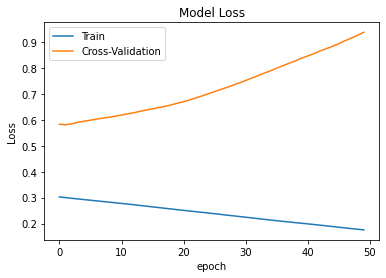

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

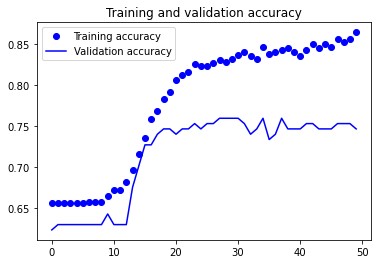

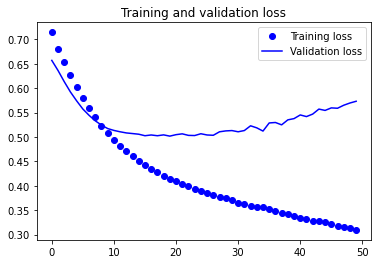

In [53]:
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [61]:


#predict uaing the model
predicted_classes = model2.predict(valid_X)
predicted_classes.shape

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, valid_Y.shape

print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


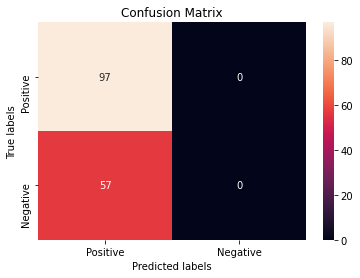

In [64]:
from sklearn.metrics import confusion_matrix

ax= plt.subplot()

cm = confusion_matrix(valid_Y, predicted_classes)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);